## Load the dataset



In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'

## Performing EDA

In [ ]:
#finding the missing values
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()
df.shape

(7043, 21)

In [ ]:
#dropping the missing values
df.dropna(inplace = True)
df2 = df.iloc[:,1:]

In [ ]:
#rechecks for any missing values
df2.TotalCharges = pd.to_numeric(df2.TotalCharges, errors='coerce')
df2.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Handling MISSING VALUES
# IMPUTE

# df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# print("Total missing values before IMPUTATION: ",df.isnull().any().sum())

# # fill missing values with mean column values
# df.fillna(df.mean(), inplace=True)
# print("Total missing values after IMPUTATION: ", df.isnull().any().sum())
# print("IMPUTED VALUE = ", df.TotalCharges[10])
# print(df)

# Label Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = df2

# List of columns to encode excluding 'Churn'
columns_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                     'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport',
                     'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','OnlineBackup','Churn']

# Apply LabelEncoder to categorical columns
labelencoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = labelencoder.fit_transform(df[column])

# Display the updated DataFrame
print(df)

print(df.columns)


      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

# Min Max

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df2 is your DataFrame
# Creating a sample DataFrame for illustration purposes
data = df  # Assign your DataFrame to the 'data' variable

df = pd.DataFrame(data)

# Columns to be scaled
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Update with your desired columns

# Applying MinMaxScaler to specific columns
min_max_scaler = MinMaxScaler()
df_scaled = df.copy()  # Make a copy of the original DataFrame
df_scaled[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

# Displaying the updated DataFrame
print(df_scaled)



NameError: name 'df' is not defined

In [ ]:
df_scaled.TotalCharges = pd.to_numeric(df2.TotalCharges, errors='coerce')
df_scaled.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import normalize


print('ORIGINAL DATA:')
print(df)

# MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df.iloc[:, :-1])

column_names = df.columns[:-1]
df_minmax = pd.DataFrame(x_scaled, columns=column_names)
df_minmax['Churn'] = df['Churn']
print('\nMinMaxScaler DATA:')
print(df_minmax)


df_normalized = df.copy()
df_normalized.iloc[:, :-1] = normalize(df_normalized.iloc[:, :-1])
print('\nNormalize DATA:')
print(df_normalized)


standard_scaler = StandardScaler()
x_standardized = standard_scaler.fit_transform(df.iloc[:, :-1])

df_standardized = pd.DataFrame(x_standardized, columns=column_names)
df_standardized['target'] = df['Churn']
print('\nStandardize DATA:')
print(df_standardized)


ORIGINAL DATA:
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1       

In [ ]:
from sklearn.model_selection import train_test_split

X = df_normalized.drop('Churn', axis=1)
y = df_normalized['Churn']  # Target

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting splits
print("Shapes of train/test sets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Shapes of train/test sets:
X_train: (5625, 19), y_train: (5625,)
X_test: (1407, 19), y_test: (1407,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the model: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1033
           1       0.65      0.27      0.38       374

    accuracy                           0.77      1407
   macro avg       0.71      0.61      0.62      1407
weighted avg       0.75      0.77      0.73      1407



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


X = df_normalized.drop('Churn', axis=1)
y = df_normalized['Churn']  # Target


# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split on resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = model_rf.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the Random Forest model: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1037
           1       0.85      0.87      0.86      1029

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



In [ ]:
import xgboost as xgb

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy and print classification report for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.85

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1037
           1       0.85      0.86      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



In [ ]:
import lightgbm as lgb
from sklearn.preprocessing import PolynomialFeatures

# Assuming df_normalized contains your preprocessed data

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df_normalized.drop('Churn', axis=1))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_poly, df_normalized['Churn'], test_size=0.2, random_state=42)

# Initialize LightGBM Classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Fit the model
lgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Calculate accuracy and print classification report for LightGBM
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy: {accuracy_lgb:.4f}")

print("\nLightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 51848
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 209
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
LightGBM Accuracy: 0.7875

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming X_train, X_test, y_train, y_test are available from the data processing step

# Initialize the model
model = Sequential()

# Add layers to the model
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")


Epoch 1/20
176/176 [==============================] - 6s 5ms/step - loss: 0.5528 - accuracy: 0.7465 - val_loss: 0.5221 - val_accuracy: 0.7576
Epoch 2/20
176/176 [==============================] - 1s 7ms/step - loss: 0.5129 - accuracy: 0.7637 - val_loss: 0.4957 - val_accuracy: 0.7719
Epoch 3/20
176/176 [==============================] - 1s 6ms/step - loss: 0.4956 - accuracy: 0.7705 - val_loss: 0.4814 - val_accuracy: 0.7704
Epoch 4/20
176/176 [==============================] - 1s 5ms/step - loss: 0.4826 - accuracy: 0.7804 - val_loss: 0.4750 - val_accuracy: 0.7747
Epoch 5/20
176/176 [==============================] - 1s 6ms/step - loss: 0.4760 - accuracy: 0.7799 - val_loss: 0.4700 - val_accuracy: 0.7747
Epoch 6/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4717 - accuracy: 0.7776 - val_loss: 0.4677 - val_accuracy: 0.7747
Epoch 7/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4683 - accuracy: 0.7804 - val_loss: 0.4637 - val_accuracy: 0.7747
Epoch 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, X_test, y_train, y_test are available from the data processing step

# Initialize KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Fit the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Calculate accuracy and print classification report for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.7555

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1033
           1       0.54      0.51      0.53       374

    accuracy                           0.76      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.76      0.75      1407



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


X = df_normalized.drop('Churn', axis=1)
y = df_normalized['Churn']  # Target


# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split on resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = model_rf.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the Random Forest model: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1037
           1       0.85      0.87      0.86      1029

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Define the number of folds for cross-validation
num_folds = 10
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# Initialize XGBoost Classifier
model_xgb = xgb.XGBClassifier(random_state=42)

# Initialize RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    model_xgb,
    param_distributions=param_dist,
    n_iter=10,
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model
random_search.fit(X_test, y_test)

# Get the best parameters
best_params = random_search.best_params_

# Train the model with the best parameters
best_model_xgb = xgb.XGBClassifier(random_state=42, **best_params)
best_model_xgb.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = best_model_xgb.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the XGBoost model: {accuracy:.2f}")

print("\nBest Hyperparameters:")
print(best_params)

print("Logistic Regression:")
print(classification_report(y_test, y_pred))


NameError: name 'X' is not defined

Confusion Matrix:
[[1020   17]
 [  14 1015]]

Accuracy: 98.50%


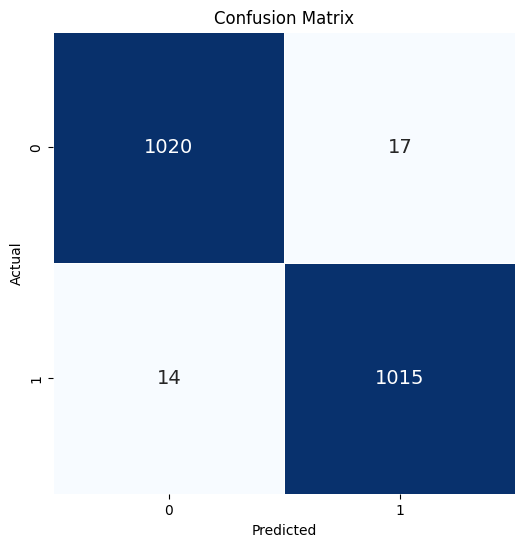

In [ ]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained the model and made predictions
y_pred = best_model_xgb.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix)

print("\nAccuracy: {:.2f}%".format(accuracy * 100))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=.5, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix:
[[1020   17]
 [  14 1015]]

Precision: 0.98
Recall: 0.99
F1-Score: 0.98


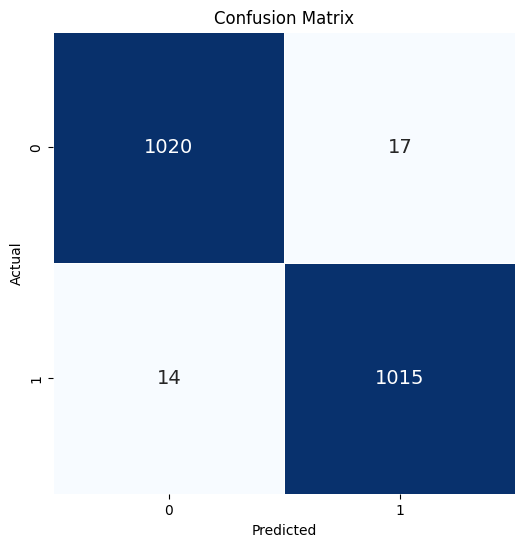

In [ ]:
#Confusion Matrix with Precision Recall

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained the model and made predictions
y_pred = best_model_xgb.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print confusion matrix and metrics
print("Confusion Matrix:")
print(conf_matrix)

print("\nPrecision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=.5, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


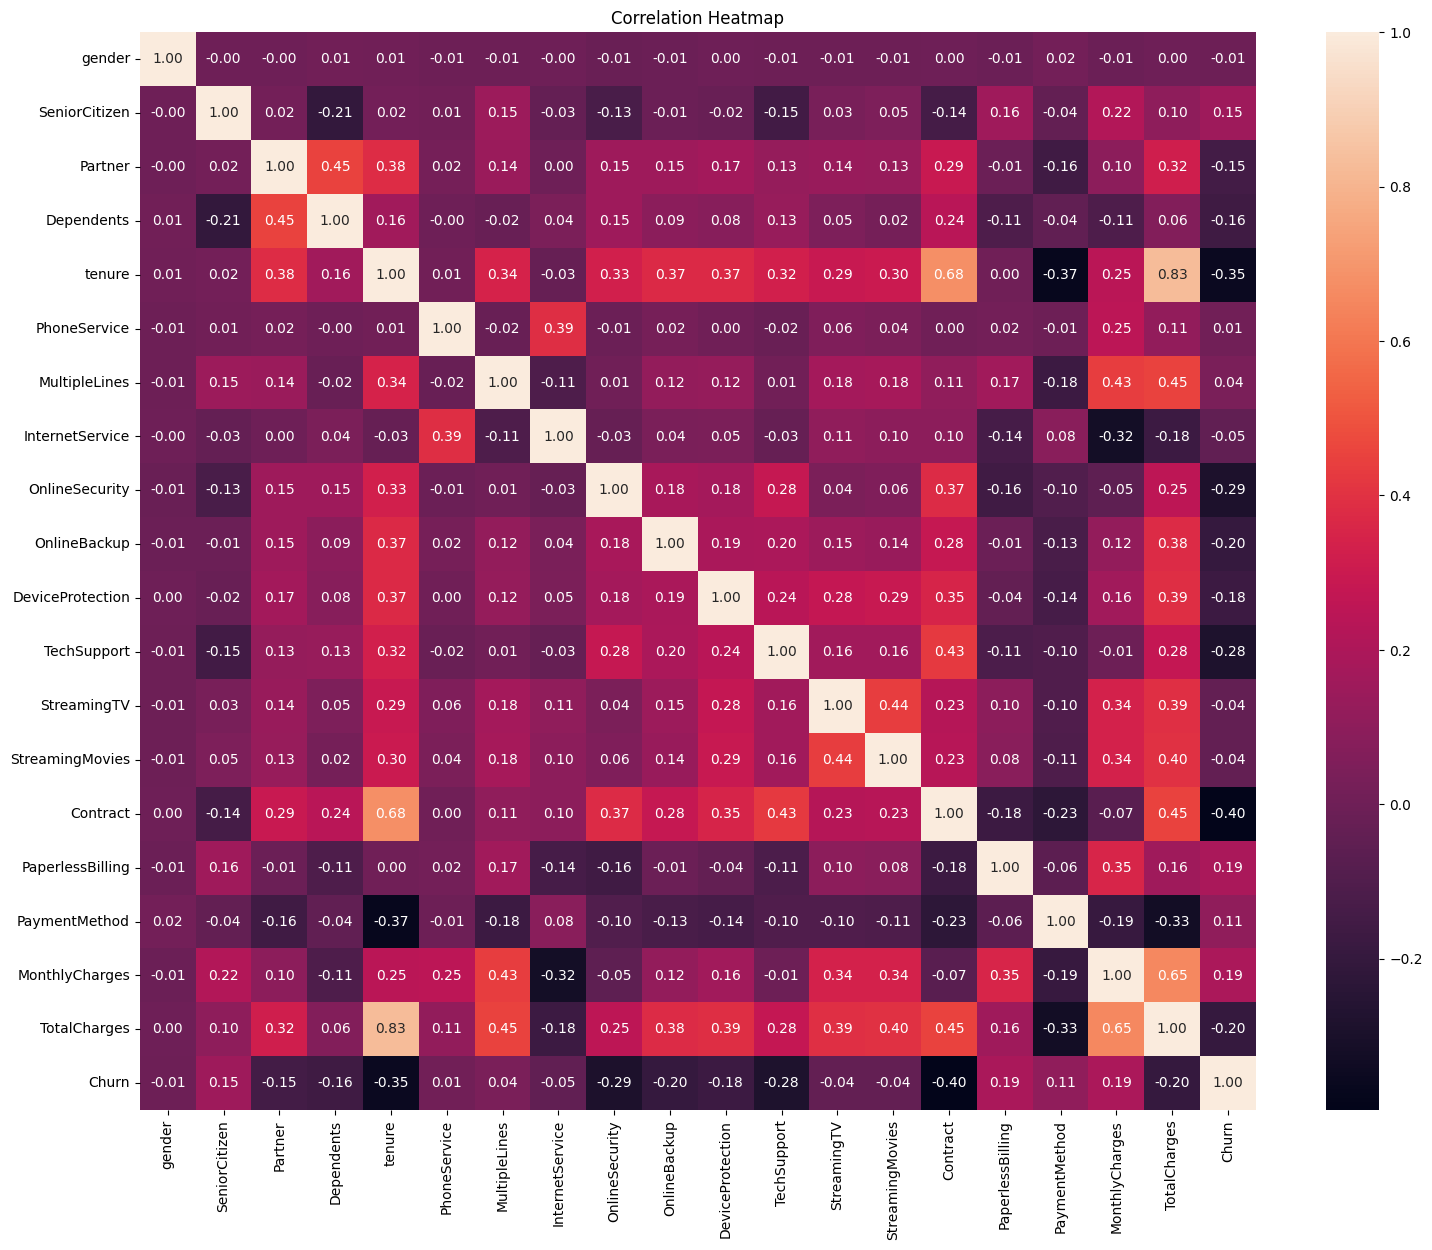

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap with modified annotation format
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')  # Set the format to display two decimal places
plt.title('Correlation Heatmap')
plt.show()

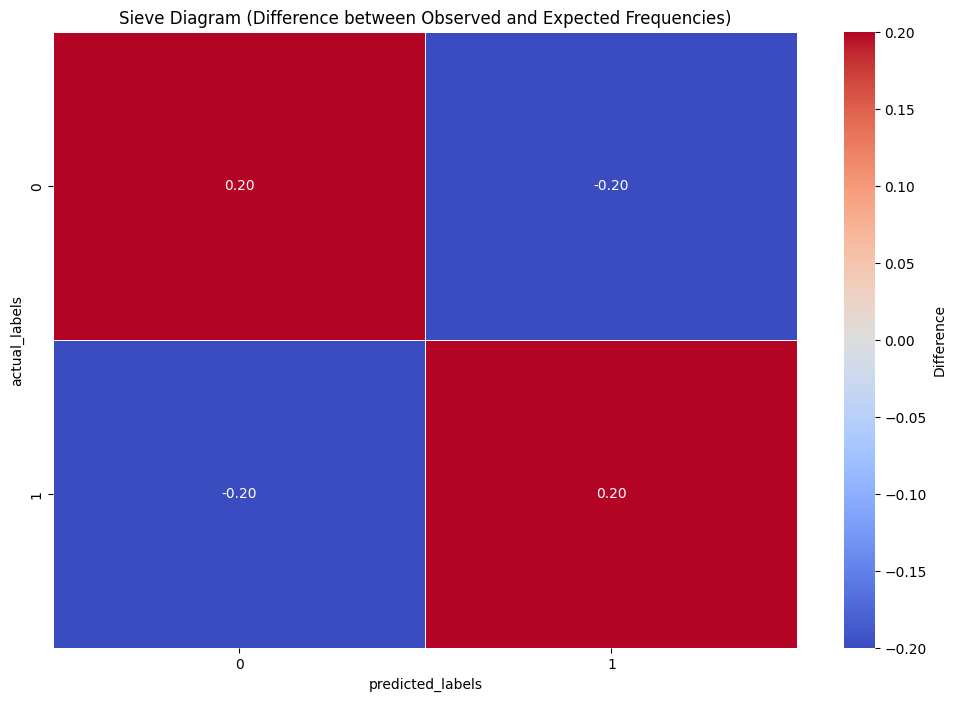

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Create a sample contingency table (replace this with your actual data)
data = {'actual_labels': [1, 1, 0, 0, 1], 'predicted_labels': [1, 0, 1, 0, 1]}
df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['actual_labels'], df['predicted_labels'])

# Perform Chi-squared test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Create a DataFrame for observed and expected frequencies
observed_df = pd.DataFrame(contingency_table.values, index=contingency_table.index, columns=contingency_table.columns)
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

# Calculate the differences between observed and expected frequencies
difference_df = observed_df - expected_df

# Plot the Sieve Diagram
plt.figure(figsize=(12, 8))
sns.heatmap(difference_df, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Difference'})
plt.title('Sieve Diagram (Difference between Observed and Expected Frequencies)')
plt.show()



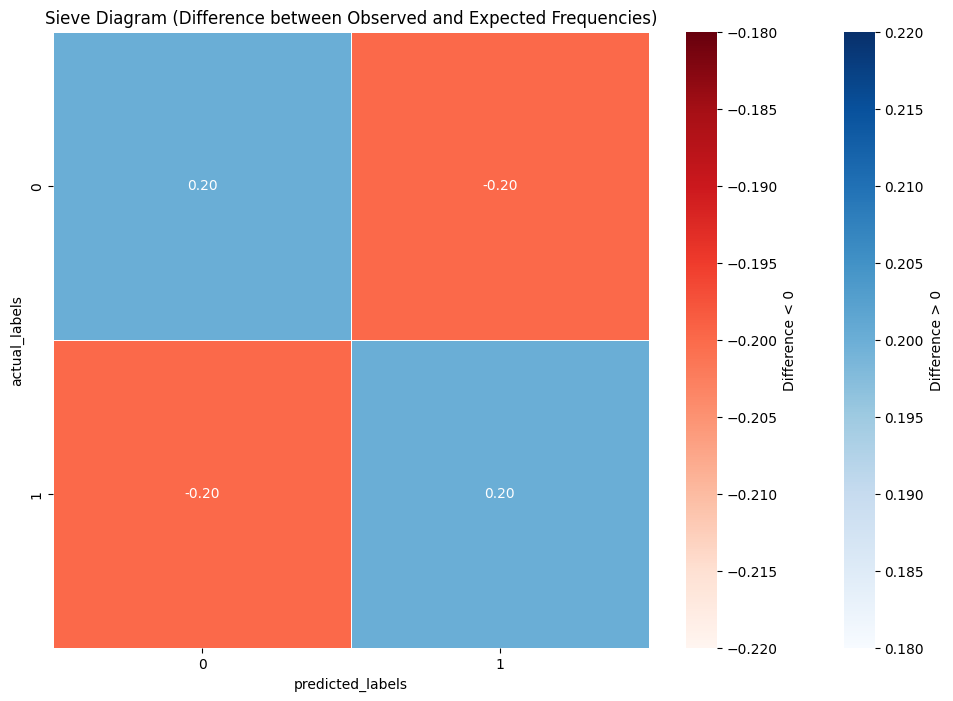

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Create a sample contingency table (replace this with your actual data)
data = {'actual_labels': [1, 1, 0, 0, 1], 'predicted_labels': [1, 0, 1, 0, 1]}
df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['actual_labels'], df['predicted_labels'])

# Perform Chi-squared test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Create a DataFrame for observed and expected frequencies
observed_df = pd.DataFrame(contingency_table.values, index=contingency_table.index, columns=contingency_table.columns)
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

# Calculate the differences between observed and expected frequencies
difference_df = observed_df - expected_df

# Plot the Sieve Diagram
plt.figure(figsize=(12, 8))

# Plot positive differences in blue
sns.heatmap(difference_df[difference_df > 0], annot=True, fmt='.2f', cmap='Blues', linewidths=.5, cbar_kws={'label': 'Difference > 0'})

# Plot negative differences in red
sns.heatmap(difference_df[difference_df < 0], annot=True, fmt='.2f', cmap='Reds', linewidths=.5, cbar_kws={'label': 'Difference < 0'})

plt.title('Sieve Diagram (Difference between Observed and Expected Frequencies)')
plt.show()


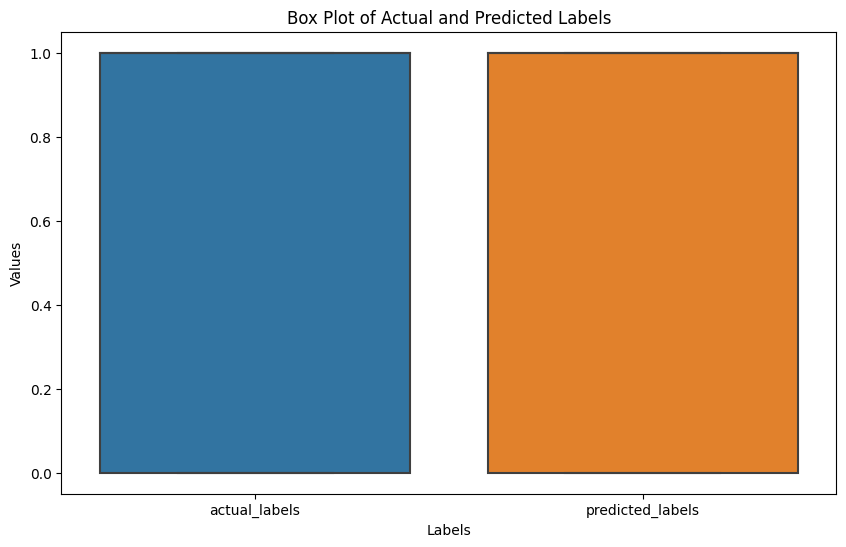

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample dataset (replace this with your actual data)
data = {'actual_labels': [1, 1, 0, 0, 1], 'predicted_labels': [1, 0, 1, 0, 1]}
df = pd.DataFrame(data)

# Melt the DataFrame for box plot
melted_df = pd.melt(df, value_vars=['actual_labels', 'predicted_labels'], var_name='Labels', value_name='Values')

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Labels', y='Values', data=melted_df)
plt.title('Box Plot of Actual and Predicted Labels')
plt.show()


<Figure size 1000x600 with 0 Axes>

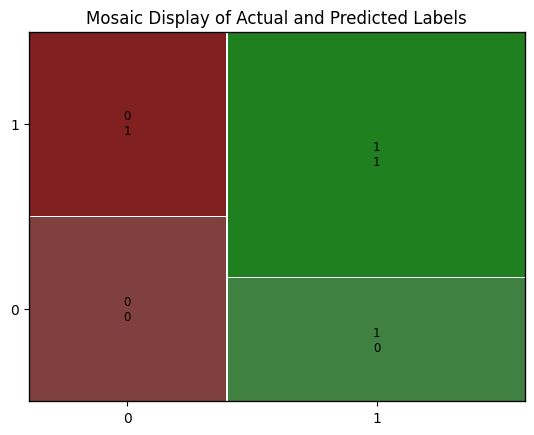

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Create a sample dataset (replace this with your actual data)
data = {'actual_labels': [1, 1, 0, 0, 1], 'predicted_labels': [1, 0, 1, 0, 1]}
df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['actual_labels'], df['predicted_labels'])

# Mosaic plot
plt.figure(figsize=(10, 6))
mosaic(contingency_table.unstack(), title='Mosaic Display of Actual and Predicted Labels')
plt.show()


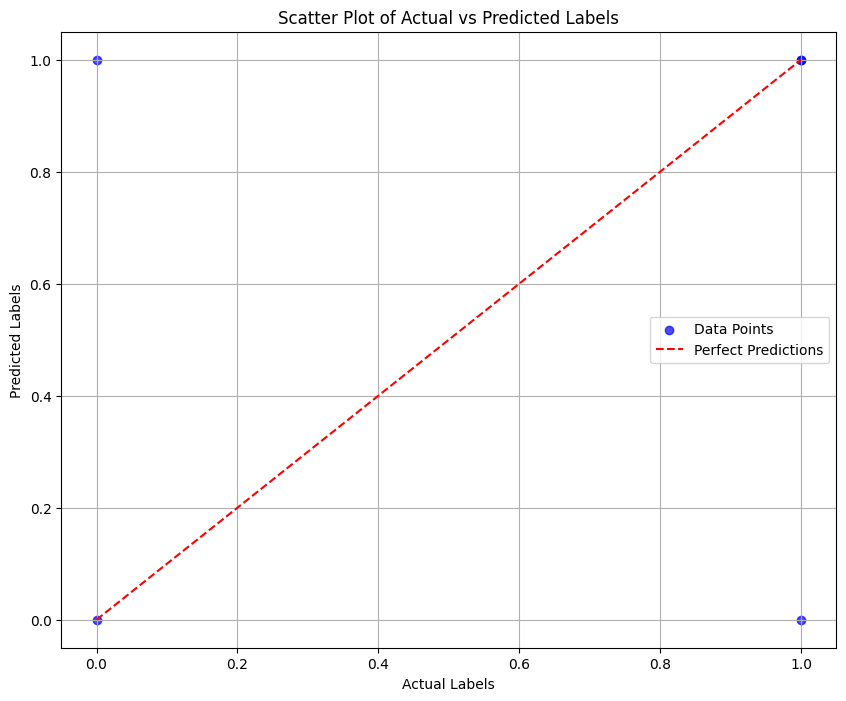

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample dataset (replace this with your actual data)
data = {'actual_labels': [1, 1, 0, 0, 1], 'predicted_labels': [1, 0, 1, 0, 1]}
df = pd.DataFrame(data)

# Scatter plot with details
plt.figure(figsize=(10, 8))

# Plot points for actual vs predicted labels
plt.scatter(df['actual_labels'], df['predicted_labels'], c='blue', alpha=0.7, label='Data Points')

# Plot a line representing perfect predictions (y = x)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Perfect Predictions')

plt.title('Scatter Plot of Actual vs Predicted Labels')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Final Random Forest Model(using XGboost) with Testing Accuracy of 98%

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Cross Validation:
num_folds = 10
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Hyperparameter tuning:
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# Shuffle the data
shuffled_indices = X_resampled.sample(frac=1, random_state=42).index
X_resampled_shuffled = X_resampled.loc[shuffled_indices]
y_resampled_shuffled = y_resampled.loc[shuffled_indices]

# Remove 200 rows
X_resampled_subset = X_resampled_shuffled.iloc[:-200]
y_resampled_subset = y_resampled_shuffled.iloc[:-200]

model_xgb = xgb.XGBClassifier(random_state=42)

random_search = RandomizedSearchCV(
    model_xgb,
    param_distributions=param_dist,
    n_iter=10,
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_resampled_subset, y_resampled_subset)

best_params = random_search.best_params_

best_model_xgb = xgb.XGBClassifier(random_state=42, **best_params)
best_model_xgb.fit(X_resampled_subset, y_resampled_subset)

# Prediction on shuffled test set
y_pred = best_model_xgb.predict(X_test)

# Calculation of testing accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the random forest model(using xgboost) on the shuffled test set: {accuracy:1f}")

print("\nBest Hyperparameters:")
print(best_params)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the random forest model(using xgboost) on the shuffled test set: 0.985963

Best Hyperparameters:
{'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1037
           1       0.98      0.99      0.99      1029

    accuracy                           0.99      2066
   macro avg       0.99      0.99      0.99      2066
weighted avg       0.99      0.99      0.99      2066



In [ ]:
#Again checking the feature importances
feature_importances = best_model_xgb.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
             Feature  Importance
14          Contract    0.351911
7    InternetService    0.057869
15  PaperlessBilling    0.054994
8     OnlineSecurity    0.054081
1      SeniorCitizen    0.052214
17    MonthlyCharges    0.041121
11       TechSupport    0.034452
2            Partner    0.032449
4             tenure    0.032131
6      MultipleLines    0.031769
9       OnlineBackup    0.030951
0             gender    0.030065
12       StreamingTV    0.029215
18      TotalCharges    0.028469
13   StreamingMovies    0.028459
16     PaymentMethod    0.028415
3         Dependents    0.027666
5       PhoneService    0.027382
10  DeviceProtection    0.026385


In [ ]:
#Final Random Forest Model(using XGboost) with Testing Accuracy of 99.013%
#simplified code using dummies
X = pd.get_dummies(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Shuffle the data
shuffled_indices = X_resampled.sample(frac=1, random_state=42).index
X_resampled_shuffled = X_resampled.loc[shuffled_indices]
y_resampled_shuffled = y_resampled.loc[shuffled_indices]

# Remove 200 rows
X_resampled_subset = X_resampled_shuffled.iloc[:-200]
y_resampled_subset = y_resampled_shuffled.iloc[:-200]

model_xgb = xgb.XGBClassifier(random_state=42)

best_params = random_search.best_params_
best_model_xgb = xgb.XGBClassifier(random_state=42, **best_params)
best_model_xgb.fit(X_resampled_subset, y_resampled_subset)

X_test = pd.get_dummies(X_test)

y_pred = best_model_xgb.predict(X_test)

# Calculation of testing accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the random forest model(using xgboost) on the shuffled test set: {accuracy:.2f}")

print("\nBest Hyperparameters:")
print(best_params)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the random forest model(using xgboost) on the shuffled test set: 0.99

Best Hyperparameters:
{'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1037
           1       0.98      0.99      0.99      1029

    accuracy                           0.99      2066
   macro avg       0.99      0.99      0.99      2066
weighted avg       0.99      0.99      0.99      2066



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and loaded your data

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# Initialize XGBoost Classifier
model_xgb = xgb.XGBClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    model_xgb,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,  # You can adjust the number of folds as needed
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_resampled, y_resampled)

# Get the best parameters
best_params = random_search.best_params_

# Train the model with the best parameters
best_model_xgb = xgb.XGBClassifier(random_state=42, **best_params)
best_model_xgb.fit(X_resampled, y_resampled)

# Predict probabilities on the test set
y_prob = best_model_xgb.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

NameError: name 'X' is not defined